# 1D problem

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import *

In [15]:
tf.__version__

'2.1.0'

In [2]:
sns.set_style('darkgrid')

In [88]:
def create_data(n, sigma):
    x = np.linspace(0, 1, n)
    y_true = np.sin(x) + 0.5*np.sin(10*x)
    y = np.sin(x) + 0.5*np.sin(10*x) + np.random.normal(0, sigma, x.shape)
    return x, y, y_true

In [89]:
x_train, y_train, y_true = create_data(1000, 0.15)
x_valid, y_valid, y_true = create_data(1000, 0.15)

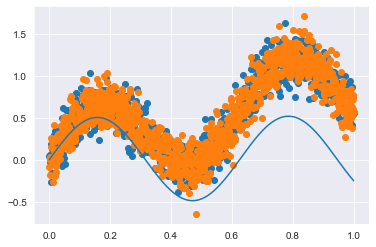

In [87]:
plt.scatter(x_train, y_train)
plt.scatter(x_valid, y_valid)
plt.plot(x_train, y_true);

## Parametric forecast

In [152]:
def crps_loss(y_true, y_pred):
    # Split input
    mu = y_pred[:, 0]
    sigma = y_pred[:, 1]

    # To stop sigma from becoming negative we first have to
    # convert it the the variance and then take the square
    # root again.
    sigma = tf.nn.relu(sigma)

    # The following three variables are just for convenience
    loc = (y_true - mu) / tf.maximum(1e-7, sigma)
    phi = 1.0 / np.sqrt(2.0 * np.pi) * tf.math.exp(-tf.math.square(loc) / 2.0)
    Phi = 0.5 * (1.0 + tf.math.erf(loc / np.sqrt(2.0)))
    # First we will compute the crps for each input/target pair
    crps =  sigma * (loc * (2. * Phi - 1.) + 2 * phi - 1. / np.sqrt(np.pi))

    # Then we take the mean. The cost is now a scalar
    return tf.reduce_mean(crps)

In [182]:
x_train, y_train, y_true2 = create_data(100000, 0.0015)
x_valid, y_valid, y_true2 = create_data(1000, 0.0015)

In [183]:
model = tf.keras.models.Sequential([
    Dense(256, input_shape=(1,), activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1)
])

In [184]:
model.compile(tf.keras.optimizers.RMSprop(1e-5), 'mae')

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

Train on 100000 samples, validate on 1000 samples
Epoch 1/10
100000/100000 [==============================] - 11s 111us/sample - loss: 0.3053 - val_loss: 0.2786
Epoch 2/10
 36576/100000 [=========>....................] - ETA: 7s - loss: 0.2778

In [175]:
preds = model.predict(x_valid)

In [176]:
preds.shape

(1000, 1)

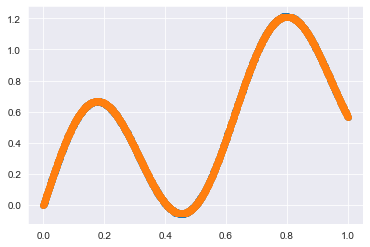

In [177]:
plt.scatter(x_valid, y_valid)
plt.scatter(x_valid, preds)

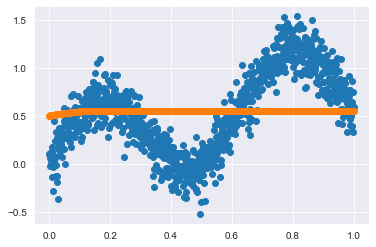

In [150]:
plt.scatter(x_valid, y_valid)
plt.scatter(x_valid, preds[:, 0])

In [ ]:
plt.scatter(x_valid, y_valid)
plt.scatter(x_valid, preds[:, 0])

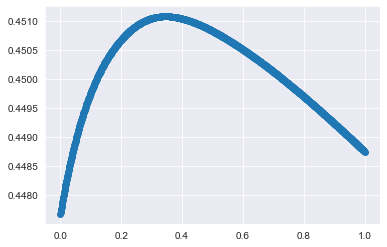

In [71]:
plt.scatter(x_valid, preds[:, 1])

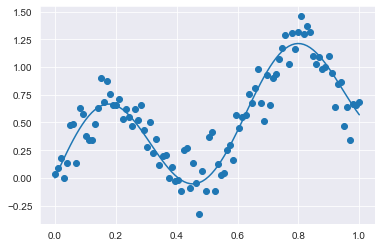

In [5]:
# Gaussian
y = np.sin(x) + 0.5*np.sin(10*x) + np.random.normal(0, 0.15, x.shape)
plt.scatter(x, y)
plt.plot(x, y_true);

In [ ]:
y_train, y_valid = 

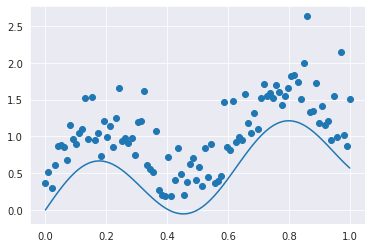

In [ ]:
# Skewed
y = np.sin(x) + 0.5*np.sin(10*x) + np.random.gamma(3, 0.15, x.shape)
plt.scatter(x, y)
plt.plot(x, y_true);

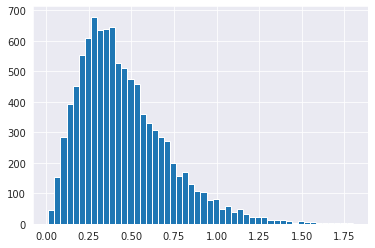

In [ ]:
plt.hist(np.random.gamma(3, 0.15, 10000), bins=50);

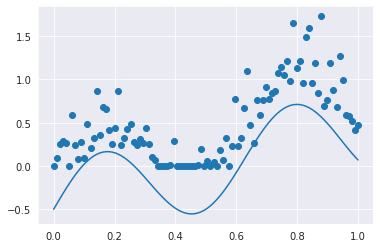

In [ ]:
# Truncated
y = -0.5 + np.sin(x) + 0.5*np.sin(10*x) + np.random.gamma(3, 0.15, x.shape)
y = np.maximum(y, 0)
plt.scatter(x, y)
plt.plot(x, y_true-0.5);

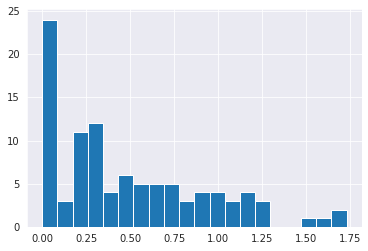

In [ ]:
plt.hist(y, bins=20);

In [ ]:
# Bimodal
y = np.sin(x) + 0.5*np.sin(10*x) + ???
plt.scatter(x, y)
plt.plot(x, y_true);

## 2D example

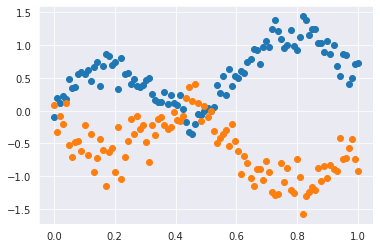

In [ ]:
# Gaussian
y1 = np.sin(x) + 0.5*np.sin(10*x) + np.random.normal(0, 0.15, x.shape)
y2 = -y1 + np.random.normal(0, 0.15, x.shape)
plt.scatter(x, y1)
plt.scatter(x, y2)

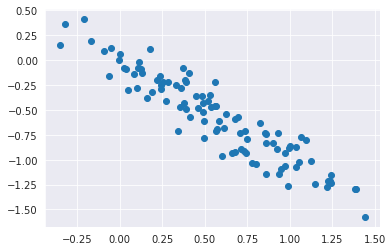

In [ ]:
plt.scatter(y1, y2)